In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math 
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier

In [237]:
save_folder = 'data_nan_mean_no_Island_70_percent'
X_train = pd.read_csv('../data/' + save_folder + '/X_train.csv').values
y_train = pd.read_csv('../data/' + save_folder + '/y_train.csv').values
X_test = pd.read_csv('../data/' + save_folder + '/X_test.csv').values
y_test = pd.read_csv('../data/' + save_folder + '/y_test.csv').values


y_train = np.squeeze(y_train)
n_values = np.max(y_train) + 1
y_train = np.eye(n_values)[y_train]

def getDataNormalization(num_samples):
    save_folder = 'train_0.5_valid_0.7_test'
    train_data = pd.read_csv('../data/' + save_folder + '/train_data_' + str(num_samples) + '_Normalization.csv')
    #X_train = train_data.drop(['Species', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'], axis = 1).values
    X_train = train_data.drop(['Species'], axis = 1).values
    y_train = train_data[['Species']].copy().values
    valid_data = pd.read_csv('../data/' + save_folder + '/train_data_' + str(num_samples) + '_valid.csv')
    #X_valid = valid_data.drop(['Species', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'], axis = 1).values
    X_valid = valid_data.drop(['Species'], axis = 1).values
    y_valid = valid_data[['Species']].copy().values
    
    # label should be int
    y_train = np.floor(y_train + 1.1).astype(int)
    y_train = np.squeeze(y_train)
    n_values = np.max(y_train) + 1
    y_train = np.eye(n_values)[y_train]
    
    # label should be int
    y_valid = np.floor(y_valid + 1.1).astype(int)
    y_valid = np.squeeze(y_valid)
    n_values = np.max(y_valid) + 1
    y_valid = np.eye(n_values)[y_valid]
    return X_train, y_train, X_valid, y_valid

def getTestData():
    save_folder = 'train_0.5_valid_0.7_test'
    test_data = pd.read_csv('../data/' + save_folder + '/test_data_NaNmean.csv')
    X_test = test_data.drop(['Species'], axis = 1).values
    y_test = test_data[['Species']].copy().values

    y_test = np.squeeze(y_test)
    n_values = np.max(y_test) + 1
    y_test = np.eye(n_values)[y_test]

    return X_test, y_test

# def getTestDataNormalization():
#     save_folder = 'train_0.5_valid_0.7_test'
#     test_data = pd.read_csv('../data/' + save_folder + '/test_data.csv')
#     X_test = test_data.drop(['Species'], axis = 1).values
#     y_test = test_data[['Species']].copy().values

#     y_test = np.squeeze(y_test)
#     n_values = np.max(y_test) + 1
#     y_test = np.eye(n_values)[y_test]

#     return X_test, y_test


In [251]:

def runRandomForest(n_estimators, criterion, X_train, y_train, X_valid, y_valid):
    penguin = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion)
    penguin.fit(X_train,y_train)

    y_predict = penguin.predict(X_valid)
    y_predict = np.argmax(y_predict, axis=1)
    y_test_label = np.argmax(y_valid, axis=1)

    score = sum(y_predict==y_test_label)/y_valid.shape[0]
    # labels = ["Adelie", "Chinstrap", "Gentoo"]

    # cm = confusion_matrix(y_test_label, y_predict)

    # disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

    # disp.plot(cmap=plt.cm.Blues)
    # # plt.savefig('../pics/random_forest/confusion_matrix')
    # # plt.savefig('../pics/random_forest/confusion_matrix.pdf')
    # plt.show()
    return (score, penguin)

#predict test
def predictRandomForest(model, X_test, y_test):
    y_predict = model.predict(X_test)
    y_predict = np.argmax(y_predict, axis=1)
    y_test_label = np.argmax(y_test, axis=1)
    score = sum(y_predict==y_test_label)/y_test.shape[0]
    
    predict_score.append(score)
    return score

In [230]:
X_train, y_train, X_valid, y_valid = getData(50)
his_1_score = []
his_2_score = []
his_3_score = []

his_NaN_Mean_model = []
his_NaN_Mean_score = []

n_estimators = [10, 15, 20]
for i in n_estimators:
    (his_1, model1) = runRandomForest(i, 'gini', X_train, y_train, X_valid, y_valid)
    his_1_score.append(his_1)
    his_NaN_Mean_model.append(model1)
    his_NaN_Mean_score.append(his_1)

X_train, y_train, X_valid, y_valid = getData(110)
for i in n_estimators:
    (his_2, model2) = runRandomForest(i, 'gini', X_train, y_train, X_valid, y_valid)
    his_2_score.append(his_2)
    his_NaN_Mean_model.append(model2)
    his_NaN_Mean_score.append(his_2)

X_train, y_train, X_valid, y_valid = getData(170)
for i in n_estimators:
    (his_3, model3) = runRandomForest(i, 'gini', X_train, y_train, X_valid, y_valid)
    his_3_score.append(his_3)
    his_NaN_Mean_model.append(model3)
    his_NaN_Mean_score.append(his_3)


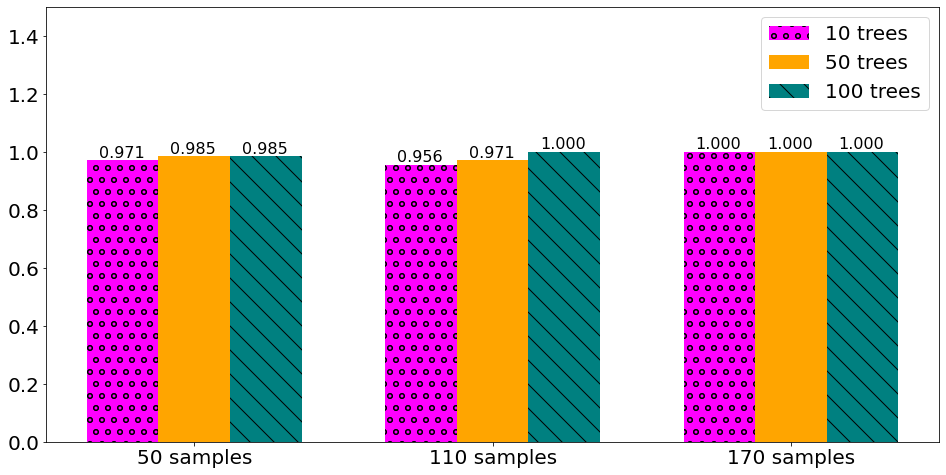

In [231]:
objects = ('50 samples', '110 samples', '170 samples')
y_pos = np.arange(len(objects))
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['font.size'] = '20'

estimators_10 = [his_1_score[0], his_2_score[0], his_3_score[0]]
estimators_50 = [his_1_score[1], his_2_score[1], his_3_score[1]]
estimators_100 = [his_1_score[2], his_2_score[2], his_3_score[2]]

for index, value in enumerate(estimators_10):
    plt.text(index - 0.32, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
for index, value in enumerate(estimators_50):
    plt.text(index - 0.08, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
for index, value in enumerate(estimators_100):
    plt.text(index + 0.16, value + 0.01, str("{:.3f}".format(value)), fontsize=16)

bars_10_estimators = plt.bar(y_pos - 0.24, estimators_10, 0.24, label = '10 trees', color = 'magenta')
plt.bar(y_pos, estimators_50, 0.24, label = '50 trees', color = 'orange')
bars_100_estimators = plt.bar(y_pos + 0.24, estimators_100, 0.24, label = '100 trees', color = 'teal')

plt.xticks(y_pos, objects)
plt.ylim([0, 1.5])
patterns = ("o", "o", "o")
for i, x in zip(bars_10_estimators,patterns):
      i.set_hatch(x)
patterns = ("\\", "\\", "\\")
for i, x in zip(bars_100_estimators,patterns):
      i.set_hatch(x)
plt.legend(fontsize = 20)
#plt.margins(0.1,0)
plt.savefig('../pics/ANN/activation_with_different_data.svg', bbox_inches='tight')
plt.savefig('../pics/ANN/activation_with_different_data.pdf', bbox_inches='tight')
plt.show()


In [240]:
#chose these best model to save 
model_NaN = np.array(his_NaN_Mean_model, dtype=object)
score_NaN = np.array(his_NaN_Mean_score)

m_score_NaN = max(score_NaN)
index_max_model_NaN = np.where((score_NaN == m_score_NaN))[0]
max_model_NaN = model_NaN[index_max_model_NaN]  
name_model_NaN = []
for i in index_max_model_NaN:
    s = str((i%3) * 5 + 10) + "_trees_" + str(50 + math.floor(i/3)*60) +   "_samples_data_NaN_Mean" 
    name_model_NaN.append(s)
    print(i, s)

5 20_trees_110_samples_data_NaN_Mean
6 10_trees_170_samples_data_NaN_Mean
7 15_trees_170_samples_data_NaN_Mean
8 20_trees_170_samples_data_NaN_Mean


In [241]:
#save NaN mean data model
import joblib
#save model
for (i, j) in zip(max_model_NaN, name_model_NaN):
  joblib.dump(i, "../results/model/data_NaN_Mean/random_forest/" + j + ".joblib")

In [252]:
#load model NaN mean
import os

predict_score = []
X_test, y_test = getTestData()

load_models = []
for file in os.listdir("../results/model/data_NaN_Mean/random_forest/"):
    if file.endswith(".joblib"):
        test_model = joblib.load("../results/model/data_NaN_Mean/random_forest/" + file)
        test_score = predictRandomForest(test_model, X_test, y_test)
        print(file + ": " + str(test_score * 100) + "%")

10_trees_170_samples_data_NaN_Mean.joblib: 96.15384615384616%
15_trees_170_samples_data_NaN_Mean.joblib: 97.11538461538461%
20_trees_110_samples_data_NaN_Mean.joblib: 96.15384615384616%
20_trees_170_samples_data_NaN_Mean.joblib: 97.11538461538461%


In [271]:
X_train, y_train, X_valid, y_valid = getDataNormalization(50)
his_1N_score = []
his_2N_score = []
his_3N_score = []
his_normalization_score = []
his_normalization_model = []
n_estimators = [10, 15, 20]
for i in n_estimators:
    (his_1N, model_normalization1) = runRandomForest(i, 'gini', X_train, y_train, X_valid, y_valid)
    his_1N_score.append(his_1N)
    his_normalization_score.append(his_1N)
    his_normalization_model.append(model_normalization1)

X_train, y_train, X_valid, y_valid = getData(110)
for i in n_estimators:
    (his_2N, model_normalization2) = runRandomForest(i, 'gini', X_train, y_train, X_valid, y_valid)
    his_2N_score.append(his_2N)
    his_normalization_score.append(his_2N)
    his_normalization_model.append(model_normalization2)

X_train, y_train, X_valid, y_valid = getData(170)
for i in n_estimators:
    (his_3N, model_normalization3) = runRandomForest(i, 'gini', X_train, y_train, X_valid, y_valid)
    his_3N_score.append(his_3N)
    his_normalization_score.append(his_3N)
    his_normalization_model.append(model_normalization3)



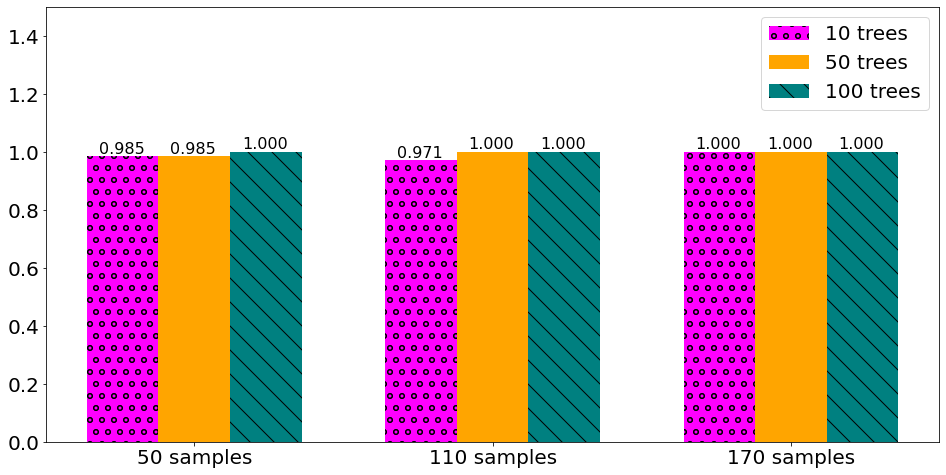

In [272]:
objects = ('50 samples', '110 samples', '170 samples')
y_pos = np.arange(len(objects))
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['font.size'] = '20'

estimators_10N = [his_1N_score[0], his_2N_score[0], his_3N_score[0]]
estimators_50N = [his_1N_score[1], his_2N_score[1], his_3N_score[1]]
estimators_100N = [his_1N_score[2], his_2N_score[2], his_3N_score[2]]

for index, value in enumerate(estimators_10N):
    plt.text(index - 0.32, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
for index, value in enumerate(estimators_50N):
    plt.text(index - 0.08, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
for index, value in enumerate(estimators_100N):
    plt.text(index + 0.16, value + 0.01, str("{:.3f}".format(value)), fontsize=16)

bars_10N_estimators = plt.bar(y_pos - 0.24, estimators_10N, 0.24, label = '10 trees', color = 'magenta')
plt.bar(y_pos, estimators_50N, 0.24, label = '50 trees', color = 'orange')
bars_100N_estimators = plt.bar(y_pos + 0.24, estimators_100N, 0.24, label = '100 trees', color = 'teal')

plt.xticks(y_pos, objects)
plt.ylim([0, 1.5])
patterns = ("o", "o", "o")
for i, x in zip(bars_10N_estimators,patterns):
      i.set_hatch(x)
patterns = ("\\", "\\", "\\")
for i, x in zip(bars_100N_estimators,patterns):
      i.set_hatch(x)
plt.legend(fontsize = 20)
#plt.margins(0.1,0)
plt.savefig('../pics/ANN/activation_with_different_data.svg', bbox_inches='tight')
plt.savefig('../pics/ANN/activation_with_different_data.pdf', bbox_inches='tight')
plt.show()


In [ ]:
#chose these best model to save
model_normalization = np.array(his_normalization_model, dtype=object)
score_normalization = np.array(his_normalization_score)

m_score_normalization = max(score_normalization)
index_max_model_normalization = np.where((score_normalization == m_score_normalization))[0]
max_model_normalization = model_normalization[index_max_model_normalization]  
name_model_normalization = []
for i in index_max_model_normalization:
    s = str((i%3) * 5 + 10) + "_trees_" + str(50 + math.floor(i/3)*60) +   "_samples_data_normalization" 
    name_model_normalization.append(s)
    print(i, s)

In [212]:
#save Normalization mean data model
import joblib
#save model
for (i, j) in zip(max_model_NaN, name_model_NaN):
  joblib.dump(i, "../results/model/data_Normalization/" + j + ".joblib")

In [ ]:
# #load model normalization
# import os

# predict_score = []
# X_test, y_test = getTestDataNormalization()

# load_models = []
# for file in os.listdir("../results/model/data_Normalization/random_forest/"):
#     if file.endswith(".joblib"):
#         test_model = joblib.load("../results/model/data_Normalization/random_forest/" + file)
#         test_score = predictRandomForest(test_model, X_test, y_test)
#         print(file + ": " + str(test_score * 100) + "%")

